In [1]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

(-1.0, 1.0)

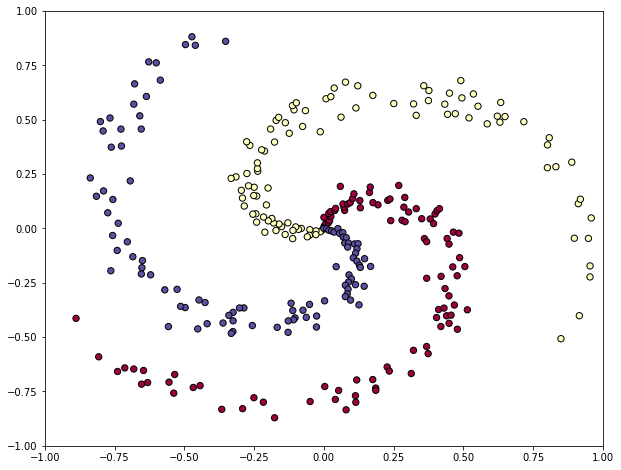

In [2]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # (300, 2)
y = np.zeros(N*K, dtype='uint8') #(300, )
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolors='k', cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
#fig.savefig('spiral_raw.png')

### Hidden Layers

In [3]:
h = 100 # no. of neurons in the hidden layer.

In [4]:
# weight matrix for hidden layer.
W = 0.01 * np.random.randn(D, h) # initialising random weights. (2, 100)
b = np.zeros((1, h)) # for intercepts (1, 100)

### Output Layer

In [5]:
# Weight matrix for o/p layer.
W2 = 0.01 * np.random.randn(h, K) # (100, 3)
b2 = np.zeros((1, K)) # (1,3)

In [6]:
lr = 1e-0
reg = 1e-3 # regularization

In [7]:
m = X.shape[0] # 300

### Forward & Backward Propagation

In [8]:
for i in range(10000):
    
    # Forward Propagation
    
    # step-1 -> evalutate class scores
    hidden_layer_output = np.maximum(0, (np.dot(X, W) + b)) #(300, 100)
    scores = np.dot(hidden_layer_output, W2) + b2 #(300,3)
    
    # step 2 -> compute the class probabilities
    exp_scores = np.exp(scores) #(300,3)
    probs = exp_scores/np.sum(exp_scores, axis = 1, keepdims=True) # softmax probability.
    
    # step 3 -> calculate loss(only for plotting not to be used in the algorithm.)
    correct_log_probs = -np.log(probs[range(m), y]) #(300, 1)
    data_loss = np.sum(correct_log_probs)/m #scalar
    
    # step 4 - regularization
    reg_loss = 0.5 * reg * np.sum(W*W) + 0.5 * reg * np.sum(W2*W2)
    loss = data_loss + reg_loss
    
    if i%1000 == 0:
        print(f"iter {i}: loss {loss}")
    
    
    # Backword Propagation
    
    # step 1 -> find the gradient of loss (y^ - y)
    dprobs = probs #(300, 3)
    dprobs[range(m), y] -= 1
    dprobs /= m #(300, 3)
    
    # step 2 -> backprop into params W2, b2
    dW2 = np.dot(hidden_layer_output.T, dprobs) #(100, 3)
    db2 = np.sum(dprobs, axis=0, keepdims=True) #(1, 3)
    
    # step 3.1 -> backprop into hidden layer
    dhidden = np.dot(dprobs, W2.T) # (300, 100)
    dhidden[hidden_layer_output <= 0] = 0
    
    # step 3.2 -> backprop into params W,b 
    dW = np.dot(X.T, dhidden) #(2, 100)
    db = np.sum(dhidden, axis=0, keepdims=True) #(1, 100)
    
    # step 4 -> regularization
    dW2 += reg*W2 #(100, 3)
    dW += reg*W #(2, 100)
    
    # step 5 -> perform update rule
    W -= lr * dW
    b -= lr * db
    
    W2 -= lr * dW2
    b2 -= lr * db2

iter 0: loss 1.0987647090609558
iter 1000: loss 0.29227833500382006
iter 2000: loss 0.2565879365770209
iter 3000: loss 0.248217284714565
iter 4000: loss 0.24618247732073525
iter 5000: loss 0.24566682668830864
iter 6000: loss 0.24543719544752757
iter 7000: loss 0.2452812521459939
iter 8000: loss 0.24517695792445302
iter 9000: loss 0.24509597011436818


In [9]:
hidden_layer = np.maximum(0, (np.dot(X, W) + b))
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print(np.mean(predicted_class == y))

0.98


### Plotting the classified output

(-1.8712034092398278, 1.8687965907601756)

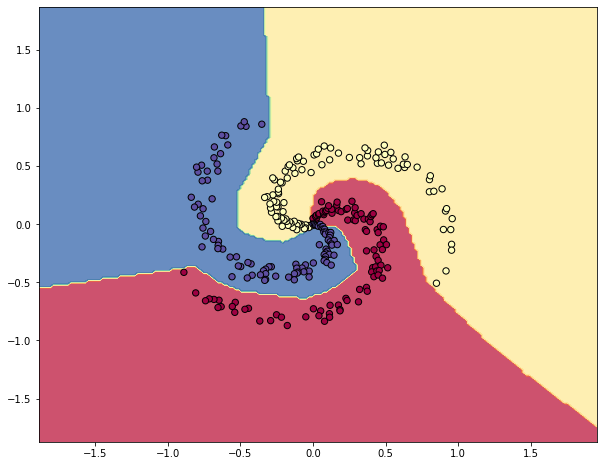

In [10]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())